In [1]:
# connect to mlflow server
import mlflow

mlflow.set_tracking_uri("http://0.0.0.0:5001")

mlflow.set_experiment("NTPC-Arima-Model")

<Experiment: artifact_location='mlflow-artifacts:/713401628820601954', creation_time=1744438757734, experiment_id='713401628820601954', last_update_time=1744438757734, lifecycle_stage='active', name='NTPC-Arima-Model', tags={}>

In [2]:
# Set up logging to a file
import logging
import os

# Get current working directory
log_file_path = os.path.join(os.getcwd(), 'mlflow_run.log')

# Set up the logger manually
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Remove all previous handlers (important in Jupyter)
logger.handlers.clear()

# Create and add FileHandler
file_handler = logging.FileHandler(log_file_path, mode='w')
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# Optional: also log to console
console_handler = logging.StreamHandler()
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)

In [3]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed_value = 42
np.random.seed(seed_value)

In [4]:
# parameters
train_size = 0.9
test_size = 0.1
assert train_size + test_size == 1, "Train and test sizes must sum to 1"

# Dataset splitting
data = pd.read_csv('../../Data/processed_data/NTPC.csv')
data.head()
split_index = int(len(data) * train_size)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
logger.info(f"Train data shape: {train_data.shape}")
logger.info(f"Test data shape: {test_data.shape}")

2025-04-12 12:43:44,453 - INFO - Train data shape: (3679, 13)
2025-04-12 12:43:44,459 - INFO - Test data shape: (409, 13)


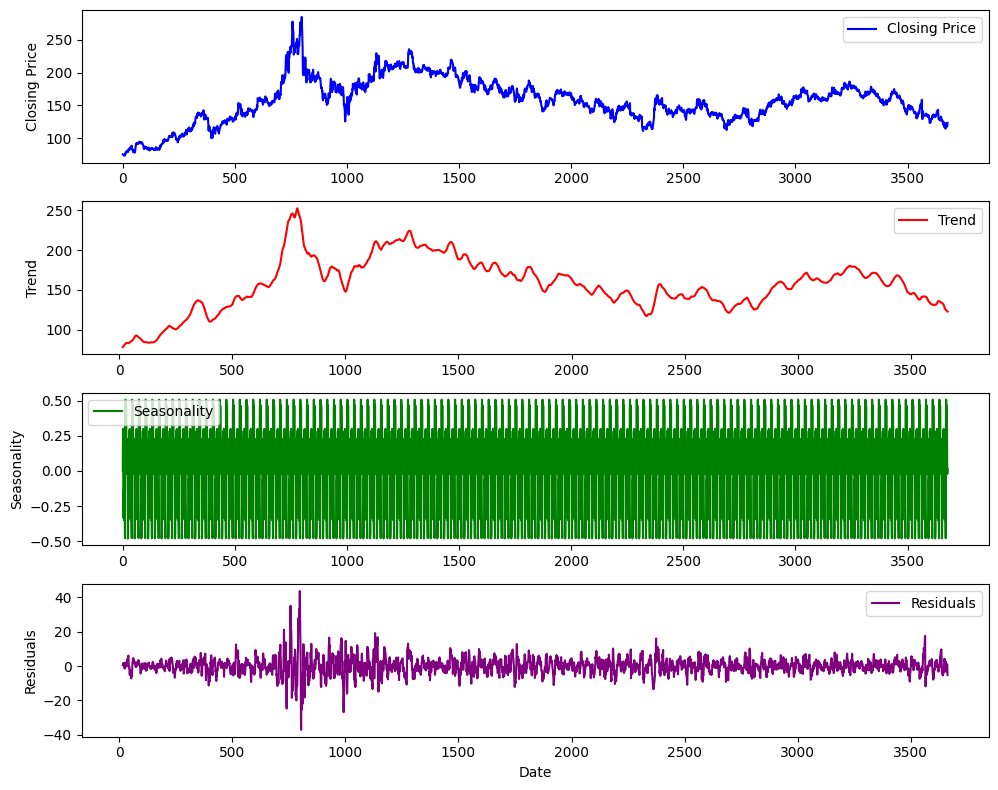

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_add = seasonal_decompose(train_data['Close'], model='additive', period=30) 

decomp = seasonal_decompose(train_data['Close'], model='additive', period=30)  # Assume monthly seasonality
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(train_data.index, train_data['Close'], label="Closing Price", color='blue')
plt.ylabel("Closing Price")
plt.legend()

plt.subplot(412)
plt.plot(decomp.trend, label="Trend", color='red')
plt.ylabel("Trend")
plt.legend()

plt.subplot(413)
plt.plot(decomp.seasonal, label="Seasonality", color='green')
plt.ylabel("Seasonality")
plt.legend()

plt.subplot(414)
plt.plot(decomp.resid, label="Residuals", color='purple')
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
import pmdarima as pm
# Fit the auto_arima model to the 'Close' column
model = pm.auto_arima(train_data['Close'], 
                      seasonal=True,  # Set to True for seasonal data
                      stepwise=True,   # Use stepwise search
                      trace=True)      # Show search process

print(model.summary())

/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18838.447, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18846.241, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18848.159, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18848.154, Time=0.09 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18844.305, Time=0.03 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18836.586, Time=0.42 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18845.873, Time=0.23 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18836.069, Time=0.47 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18836.609, Time=0.52 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18846.080, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=18834.198, Time=0.21 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18846.218, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=18846.223, Time=0.04 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=18834.719, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=18834.697, Time=0.13 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=18843.942, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18844.148, Time=0.10 sec


/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/ts_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18836.561, Time=0.61 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 4.840 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3679
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -9414.099
Date:                Sat, 12 Apr 2025   AIC                          18834.198
Time:                        12:44:03   BIC                          18852.829
Sample:                             0   HQIC                         18840.830
                               - 3679                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9221      0.016     58.817      0.000       0.891